In [1]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import warnings
from matplotlib import style
from collections import Counter
import pandas as pd
import random

style.use("fivethirtyeight")
plt.rcParams['figure.figsize'] = [10, 5]

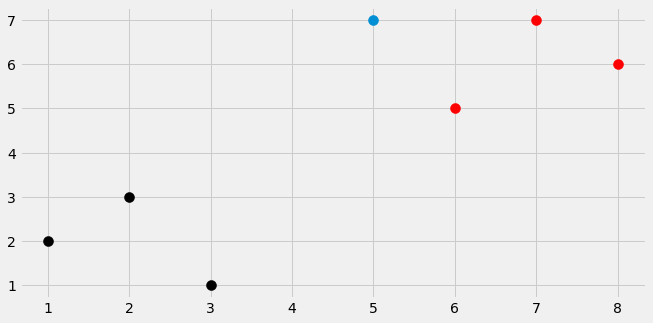

In [2]:
dataset = {"k":[[1,2],[2,3],[3,1]],"r":[[6,5],[7,7],[8,6]]}
new_features = [5,7]

for i in dataset:
    for j in dataset[i]:
        plt.scatter(j[0],j[1], s=100 , color=i)
plt.scatter(new_features[0],new_features[1],s=100)
plt.show()

In [3]:
def knn(data, predict, k=3):
    if(len(data)) >= k:
        warnings.warn("k is set to a value lesser than total voting groups!")
    distances = []
    
    for group in data:
        for features in data[group]:
            euclidean_dist = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_dist,group])
    
    votes = [i[1] for i in sorted(distances)[:k]]
#     print(Counter(votes).most_common(1)) => [('r', 3)]
    vote_result = Counter(votes).most_common(1)[0][0]
    confidence =  Counter(votes).most_common(1)[0][1]/k
#     print(vote_result,confidence)
    return vote_result,confidence

In [4]:
print(knn(dataset,new_features,k=3))

('r', 1.0)


In [5]:
df = pd.read_csv("breast-cancer-wisconsin.data")
df.replace("?",-99999,inplace=True)
df.drop(columns="id",inplace=True)
df = df.astype(float)
df = df.sample(frac=1).reset_index(drop=True) #shuffling the dataframe

In [6]:
#splitting dataset
test_size = 0.2
train_data = df.iloc[:-int(test_size*len(df))] 
test_data = df.iloc[-int(test_size*len(df)):]

In [7]:
#dictionary from dataframe
train_set = {2:[],4:[]}
test_set = {2:[],4:[]}

for i in [2,4]:
    filt = train_data["class"] == i
    train_set[i] = train_data[filt].drop(columns="class").to_numpy().tolist()
    filt = test_data["class"] == i
    test_set[i] = test_data[filt].drop(columns="class").to_numpy().tolist()

In [8]:
counter=0
total=0
for group in test_set:
    for data in test_set[group]:
        result,confidence = knn(train_set, data, k=5)
        if result == group:
            counter+=1
#         else:
#             print(confidence)
        total+=1

            
print("Accuracy: "+str(counter/total))                

Accuracy: 0.9712230215827338
